# Machine Learning on Titanic Dataset

In [1]:
##activating my virtual environment akash1
 
!activate akash1


(akash1) C:\Users\user>conda.bat activate akash1 


In [2]:
##importing all necessary libraries to read the dataset and explore it

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn.metrics import accuracy_score

In [3]:
##reading our dataset
train= pd.read_csv("train1.csv")
print(train.shape)

(891, 12)


In [4]:
##checking the first five rows of our dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis of Dataset

In [5]:
## checking the null values present in our dataset

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
## creating a variable features_with_na to store our featurs which has missing values
features_with_na=[ features for features in train.columns if train[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(train[feature].isnull().mean(),4), '%missing values')

Age 0.1987 %missing values
Cabin 0.771 %missing values
Embarked 0.0022 %missing values


In [7]:
##checking the mean of all the null values

train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [8]:
##printing the mean as percentage form
print(train.isnull().mean()*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [9]:
## calculating the measures of central tendancy and quantiles of our dataset
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

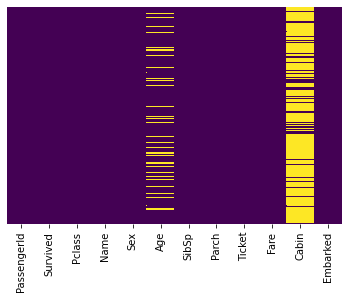

In [11]:
##plotting the null values in a heatmap

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

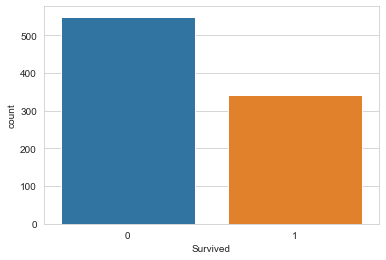

In [12]:
## using a countplot to count the number of peoples who survived or died

sns.set_style('whitegrid')
sns.countplot(x='Survived', data= train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

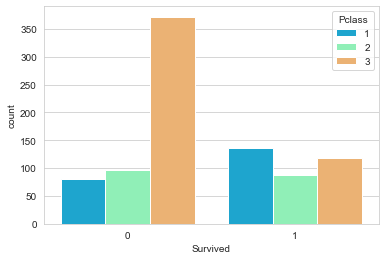

In [13]:
## counting the survived passengers based on Passenger class

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass', data= train,palette='rainbow')##

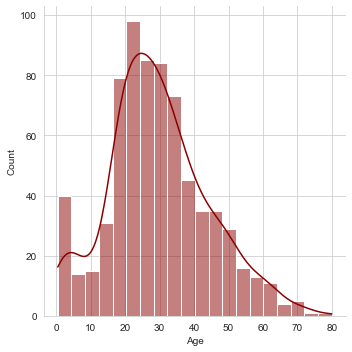

In [14]:
## plotting a distplot for checking the distribution of the 'Age' feature

sns.displot(x = train['Age'].dropna(),kde = True,color='darkred')

<AxesSubplot:>

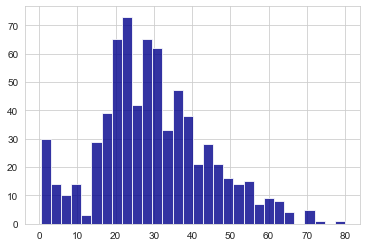

In [15]:
## plotting a histogram with hist function

train['Age'].hist(bins=30,color='darkblue',alpha=0.8)

<AxesSubplot:>

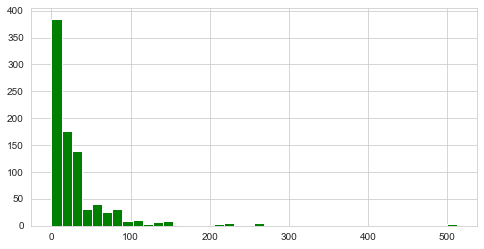

In [16]:
##checking the distribution of 'Fare' feature

train['Fare'].hist(color = 'green', bins = 40, figsize = (8,4))

Text(0.5, 1.0, 'SURVIVAL BY AGE')

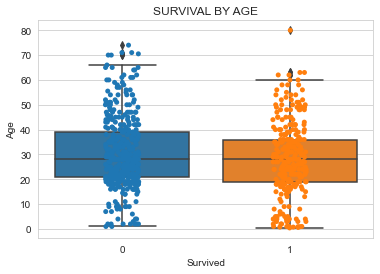

In [17]:
## plotting a box plot 

sns.boxplot(x="Survived", y="Age",data=train)
sns.stripplot(x="Survived", y="Age",data=train,jitter=True ,edgecolor="gray")
plt.title("SURVIVAL BY AGE",fontsize=12)

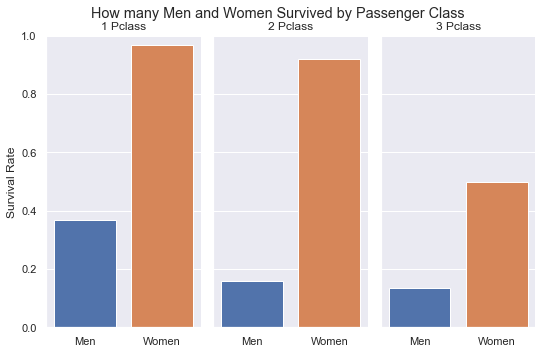

In [18]:
## using a catplot to display the passengers survived w.r.t plcass and sex
sns.set(font_scale=1)
g = sns.catplot(x="Sex", y="Survived", col="Pclass",
                    data=train, saturation=.9,
                    kind="bar", ci=None, aspect=.5)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=False))  
plt.subplots_adjust(top=0.9)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');

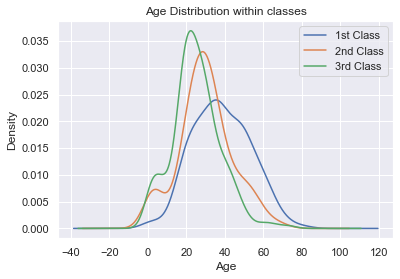

In [20]:
## checking the distribution of 'Pclass' feature

train.Age[train.Pclass == 1].plot(kind='kde')    
train.Age[train.Pclass == 2].plot(kind='kde')
train.Age[train.Pclass == 3].plot(kind='kde')
 # plots an axis lablel
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;

Skewness of age : 0.548


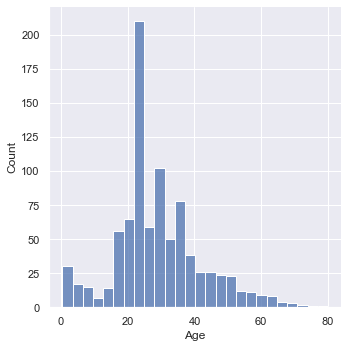

In [63]:
##checking the skewness of 'Age' feature

print('Skewness of age :',round(train['Age'].skew(),3))
sns.displot(train['Age'])
plt.show()

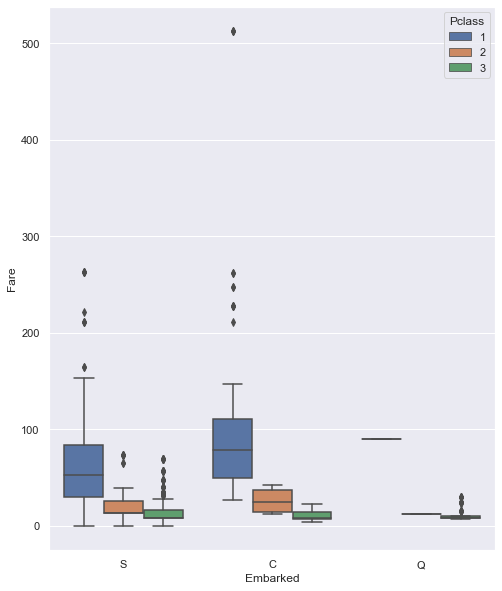

In [22]:
##checking outliers using boxplot
fig_dims = (8, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train, ax=ax);

<AxesSubplot:xlabel='Sex'>

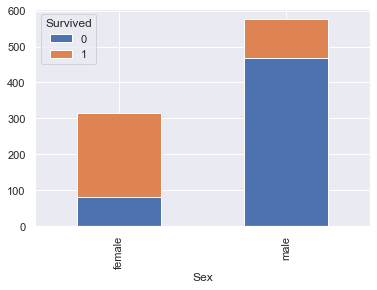

In [23]:
# using another function crosstab to show survived passengers w.r.t sex
pd.crosstab(train['Sex'],train['Survived']).plot(kind='bar',stacked=True)

In [24]:
##copying the datatset to variable train1

train1 = train.copy()

In [25]:
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Splitting the dataset into categorical and numerical sets.**

train1_num : Numerical set

train1_cat : Categorical set

In [26]:
train1_num =  train1[['Age','SibSp','Parch','Fare']]
train1_cat = train1[['Survived','Pclass','Sex','Ticket','Cabin', 'Embarked']]

In [27]:
train1_num.head()

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


In [28]:
train1_cat.head()

,Survived,Pclass,Sex,Ticket,Cabin,Embarked
0,0,3,male,A/5 21171,NaN,S
1,1,1,female,PC 17599,C85,C
2,1,3,female,STON/O2. 3101282,NaN,S
3,1,1,female,113803,C123,S
4,0,3,male,373450,NaN,S


<AxesSubplot:>

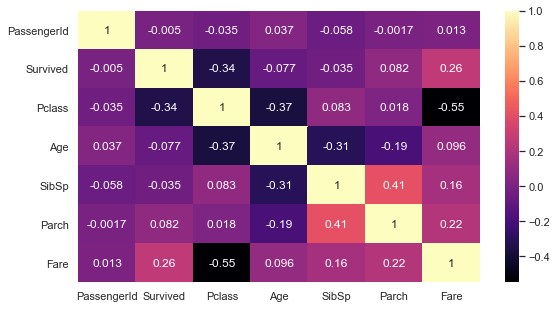

In [29]:
# Correlation between variables
plt.figure(figsize=((9,5)))
sns.heatmap(train1.corr(), cmap ='magma' , annot =True)

In [32]:
#checking the categorical variables of 'Embarked' feature
train.Embarked.value_counts().to_frame()

,Embarked
S,644
C,168
Q,77


# Checking the missing null values in Age 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

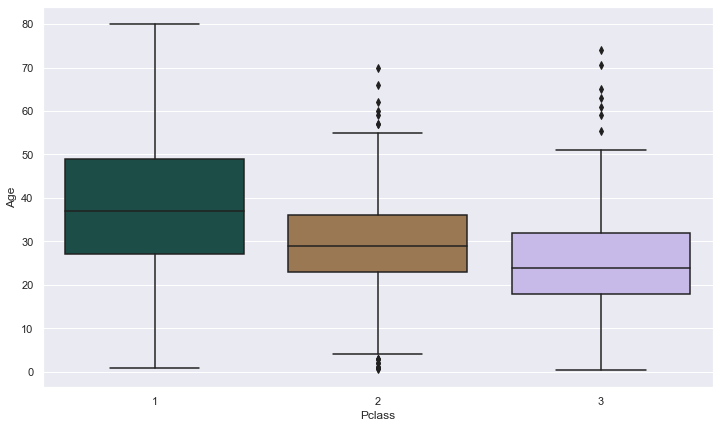

In [33]:
plt.figure(figsize=(12, 7))
sns.boxplot(x = train['Pclass'], y = train['Age'], data = train , palette = 'cubehelix', saturation= 0.80)


# Imputing Age According to Pclass

In [34]:
#function to impute age to the dataset
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [35]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis =1)

<AxesSubplot:>

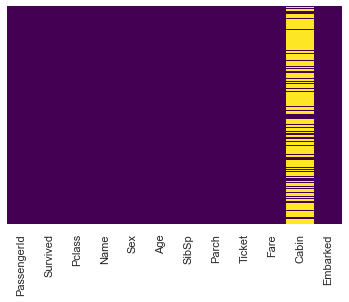

In [36]:
#checking the heatmap again
sns.heatmap(train.isnull(), yticklabels = False,cbar = False, cmap = 'viridis')

We can see that feature still cabin has null values. 

In [37]:
train.corr()[['Survived']].T ##.T is used to transpose the data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,-0.005007,1.0,-0.338481,-0.047255,-0.035322,0.081629,0.257307


Here we can see that Cabin doen't have any correlation with the people who survived. So we can drop this feature from the dataset.

In [38]:
train.drop('Cabin', axis = 1, inplace = True)

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

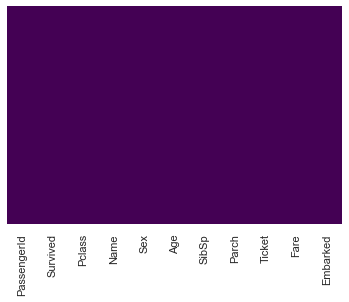

In [40]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [42]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [43]:
embark.head().T

,0,1,2,3,4
Q,0,0,0,0,0
S,1,0,1,1,1


In [44]:
sex.head().T

,0,1,2,3,4
male,1,0,0,0,1


In [45]:
#Checking the originial dataset after droping cabin feature
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [46]:
#dropping the Sex, Embarked, Name and Tickey features from the dataset
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [47]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [48]:
#concatenating the encoded categorical features
train = pd.concat([train,sex,embark],axis=1)

In [49]:
#checking the new dataset
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [50]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [51]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [53]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
520,521,1,30.0,0,0,93.5000,0,0,1
510,511,3,29.0,0,0,7.7500,1,1,0
446,447,2,13.0,0,1,19.5000,0,0,1
2,3,3,26.0,0,0,7.9250,0,0,1
691,692,3,4.0,0,1,13.4167,0,0,0


In [54]:
X_train.shape

(623, 9)

In [55]:
y_train.head()

520    1
510    1
446    1
2      1
691    1
Name: Survived, dtype: int64

In [56]:
y_train.shape

(623,)

# Training and Predicting Model for Different Algorithms

## **Logistic Regression**

In [57]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_predict= lr.predict(X_test)
print('score =',lr.score(X_test,y_test))
print ("Accuracy = %.2f" % (accuracy_score(y_test,y_predict)))

score = 0.7686567164179104
Accuracy = 0.77


C:\Users\user\anaconda3\envs\akash1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# XGBoost Classifier

In [58]:
from xgboost.sklearn import XGBClassifier
XgC = XGBClassifier(learning_rate=0.001,n_estimators=3000,
                                max_depth=2, min_child_weight=0,
                                subsample=0.5,
                                colsample_bytree=0.5,
                                scale_pos_weight=1, seed=44,
                                reg_alpha=0.001)
XgC.fit(X_train,y_train)

y_predict= XgC.predict(X_test)
print('score =',XgC.score(X_test,y_test))
print ("Accuracy = %.2f" % (accuracy_score(y_test,y_predict)))

C:\Users\user\anaconda3\envs\akash1\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score = 0.8171641791044776
Accuracy = 0.82


# Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

y_predict= clf.predict(X_test)
print ("Accuracy = %.2f" % (accuracy_score(y_test,y_predict)))

Accuracy = 0.82


# KNN Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_predict= knn.predict(X_test)
print ("Accuracy = %.2f" % (accuracy_score(y_test,y_predict)))

Accuracy = 0.60


**Getting a perfect value of n_numbers in order to get higher accuracy**

In [61]:
from sklearn.model_selection import cross_val_score
accuracy_rate = []


for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Error Rate')

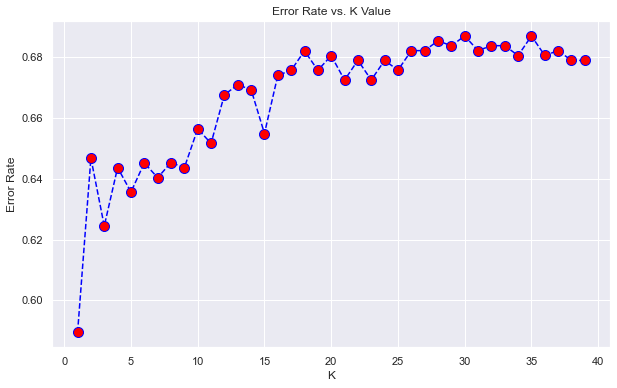

In [62]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Since, we are geting an acuracy rate between 0.60 to 0.68, therefore, KNN will not be a suitable algorithm for this particular problem set
